In [1]:
# If you run this notebook on Google Colaboratory, uncomment the below to install automl_alex.
#!pip install -U -q automl-alex

In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

import automl_alex
print(automl_alex.__version__)

0.11.24


In [2]:
RANDOM_SEED = 42

# Regression

## Data

In [3]:
from sklearn.datasets import load_boston
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data.data), 
                                                    pd.DataFrame(data.target), 
                                                    test_size=0.15, 
                                                    random_state=RANDOM_SEED,)

X_train.shape, X_test.shape

((430, 13), (76, 13))

## Model

In [4]:
# Libraries are currently available:
automl_alex.models.all_models

{'LightGBM': automl_alex.models.model_lightgbm.LightGBM,
 'KNeighbors': automl_alex.models.sklearn_models.KNeighbors,
 'LinearSVM': automl_alex.models.sklearn_models.LinearSVM,
 'LinearModel': automl_alex.models.sklearn_models.LinearModel,
 'SGD': automl_alex.models.sklearn_models.SGD,
 'RandomForest': automl_alex.models.sklearn_models.RandomForest,
 'ExtraTrees': automl_alex.models.sklearn_models.ExtraTrees,
 'XGBoost': automl_alex.models.model_xgboost.XGBoost,
 'CatBoost': automl_alex.models.model_catboost.CatBoost,
 'MLP': automl_alex.models.sklearn_models.MLP}

You can add a library if you wish.

In [5]:
from automl_alex import LightGBM, LightGBMRegressor

# We will use LightGBM for this dataset
model = LightGBM(X_train, y_train, X_test, type_of_estimator='regression', random_state=RANDOM_SEED)

# or Simply
model = LightGBMRegressor(X_train, y_train, X_test, random_state=RANDOM_SEED)

In [6]:
model.model_param

{'random_seed': 42,
 'early_stopping_rounds': 50,
 'num_iterations': 200,
 'verbose': -1,
 'device_type': 'cpu'}

In [7]:
predicts = model.predict()
predicts

100%|██████████| 1/1 [01:13<00:00, 73.42s/it]
 Mean Score mean_squared_error on 20 Folds: 10.8665 std: 5.269591



,model_name,predict_test,predict_train
0,0_LightGBM,"[25.624219445377463, 32.65324971423799, 15.085...","[20.21678999475246, 47.5198209009377, 9.199600..."


In [8]:
print('Test MSE: ', sklearn.metrics.mean_squared_error(y_test, predicts['predict_test'][0]))

Test MSE:  6.5977882213630155


In [9]:
# the predicate function has some interesting cv parameters
predicts = model.predict(cv_folds=5, n_repeats=2)
print('Test MSE: ', sklearn.metrics.mean_squared_error(y_test, predicts['predict_test'][0]))

100%|██████████| 1/1 [00:27<00:00, 27.34s/it]
 Mean Score mean_squared_error on 10 Folds: 11.139 std: 3.129215
Test MSE:  6.349417095344015



if we can optimize the model parameters the result can be improved

### Optimizing Parameters
In this library, I tried to simplify the process of optimizing and iterating parameters as much as possible. You just specify how much time you are willing to spend on optimization, and the library will select the rules for cross-validation, optimization depth, and other optimization parameters based on this time. The more time you give it, the better it will be able to select parameters.

[RUS]
В этой библиотеке я постарался максимально упростить процесс оптимизации и перебора параметров. Вы просто указываете сколько вы готовы потратить времени на оптимизацию, а библиотека сама подберет правила кроссвалидации, глубины оптимизации и прочии параметры оптимизации исходя из этого времени. Чем больше времени вы ей дадите, тем более качественней она сможет подобрать параметры.

In [10]:
history = model.opt(timeout=600, feature_selection=True)

One iteration takes ~ 4.8 sec
> Start Auto calibration parameters
[I 2020-11-23 10:54:45,950] A new study created in memory with name: no-name-01162c7a-80c9-453c-b203-bcdaf5a74919
> Start optimization with the parameters:
CV_Folds =  5
Score_CV_Folds =  2
Feature_Selection =  True
Opt_lvl =  1
Cold_start =  61.0
Early_stoping =  100
Metric =  mean_squared_error
Direction =  minimize
##################################################
Default model OptScore = 9.0804
Optimize: : 94it [10:01,  6.40s/it,  | Model: LightGBM | OptScore: 8.1097 | Best mean_squared_error: 7.7077 +- 0.401974]


In [11]:
predicts = model.predict() # the default prediction comes from the last best model
print('\n Test MSE: ', sklearn.metrics.mean_squared_error(y_test, predicts['predict_test'][0]))

100%|██████████| 1/1 [00:28<00:00, 28.78s/it]
 Mean Score mean_squared_error on 10 Folds: 12.3765 std: 4.218353

 Test MSE:  4.653459798977227



In [12]:
history.head(5)

,score_opt,model_score,score_std,model_name,model_param,wrapper_params,cat_encoders,columns,cv_folds
67,8.1097,7.7077,0.401974,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(0, 1, 3, 5, 7, 9, 10, 11, 12, FrequencyEncode...",5
66,8.1570,8.1213,0.035725,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(0, 1, 3, 5, 7, 9, 10, 11, 12, FrequencyEncode...",5
61,8.1787,8.1121,0.066600,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(0, 1, 3, 5, 7, 9, 11, 12, FrequencyEncoder_5,...",5
59,8.1805,7.7678,0.412739,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(0, 1, 3, 5, 7, 9, 10, 11, 12, FrequencyEncode...",5
1,8.3097,8.1299,0.179841,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(1, 2, 3, 6, 8, 9, 12, FrequencyEncoder_2, Fre...",5


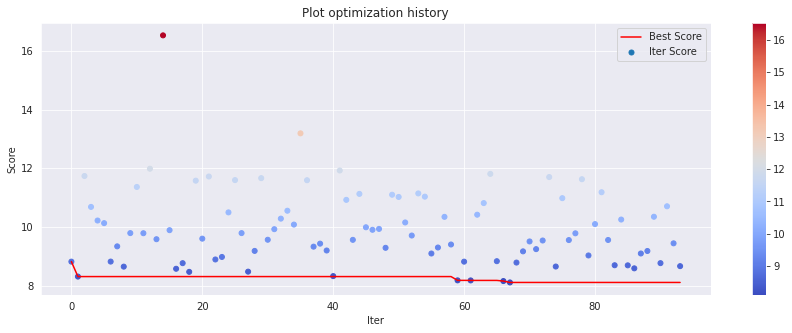

In [13]:
model.plot_opt_history()

# Classifier

## Data

In [14]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='credit-g', version=1, as_frame=True)
dataset.target = dataset.target.astype('category').cat.codes
dataset.data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, 
                                                    dataset.target,
                                                    test_size=0.25, 
                                                    random_state=RANDOM_SEED,)
X_train.shape, X_test.shape

((750, 20), (250, 20))

## Model

In [16]:
from automl_alex import LightGBMClassifier
model = LightGBMClassifier(X_train, y_train, X_test, random_state=RANDOM_SEED)

In [17]:
# fit_predict with default model parameters
predicts = model.predict()
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [01:06<00:00, 66.74s/it]
 Mean Score roc_auc_score on 20 Folds: 0.7561 std: 0.040256
Test AUC:  0.7993



### Optimize

In [18]:
history = model.opt(timeout=1000, verbose=1)

One iteration takes ~ 1.9 sec
> Start Auto calibration parameters
> Start optimization with the parameters:
CV_Folds =  10
Score_CV_Folds =  3
Feature_Selection =  True
Opt_lvl =  2
Cold_start =  34.0
Early_stoping =  100
Metric =  roc_auc_score
Direction =  maximize
##################################################
Default model OptScore = 0.6767
Optimize: : 198it [12:06,  4.56s/it,  | Model: LightGBM | OptScore: 0.7638 | Best roc_auc_score: 0.7994 +- 0.035588]
 EarlyStopping Exceeded: Best Score: 0.7638 roc_auc_score
Optimize: : 198it [12:06,  3.67s/it,  | Model: LightGBM | OptScore: 0.7638 | Best roc_auc_score: 0.7994 +- 0.035588]


In [19]:
predicts = model.predict()
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [00:36<00:00, 36.72s/it]
 Mean Score roc_auc_score on 20 Folds: 0.7737 std: 0.034527
Test AUC:  0.78



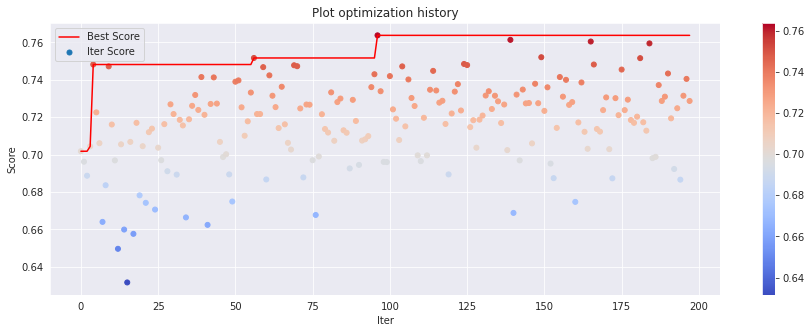

In [20]:
model.plot_opt_history()

# How it works
first let's look at all the parameters available to us     
для начала посмотрим все доступные нам параметры

```python
model = LightGBMClassifier(
    X_train, 
    y_train, 
    X_test, # be sure to specify X_test, because the encoder needs all dataset to work.
    cat_features=None, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    clean_and_encod_data=True, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    cat_encoder_names=['OneHotEncoder', 'HelmertEncoder', 'HashingEncoder', 'FrequencyEncoder'],  # see in 03. Data Cleaning and Encoding (DataBunch).ipynb 
    num_generator_features=True, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    group_generator_features=False, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    clean_nan=True, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    databunch=None, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    model_param=None, # default model parameters
    wrapper_params=None, # default wrapper_params parameters
    auto_parameters=True, # automatic selection of optimization parameters
    cv=10, # Cross-validation folds
    score_cv_folds=5, # how many folds are actually used for score
    opt_lvl=3, # depth of selection of parameters
    metric=sklearn.metrics.roc_auc_score, # any metric from sklearn
    direction='maximize', # optimization direction
    combined_score_opt=True, # score_opt = score - std
    metric_round=4, 
    cold_start=150, # how many iterations the selection of parameters will be random
    gpu=False, 
    random_state=RANDOM_SEED,
    )
```
**Let's look at the important parameters and what they give.**

### *model_param*
parameters of the model itself. As you already understood, to work with the library itself, I use some kind of wrapper, but *model_param* pass the settings directly to the model itself

In [21]:
model.model_param

{'random_seed': 42,
 'early_stopping_rounds': 50,
 'num_iterations': 300,
 'verbose': -1,
 'device_type': 'cpu',
 'objective': 'binary',
 'min_child_samples': 4,
 'learning_rate': 0.03,
 'num_leaves': 48,
 'bagging_fraction': 0.5,
 'feature_fraction': 0.5,
 'bagging_freq': 10}

### *wrapper_params*
Here we specify the settings of the wrapper. For example, for some algorithms (such as networks), we need to normalize the data. But this is not a reason to do it for the all dataset if we are opt various algorithms. For this reason, specifying *'need_norm_data': False* of the wrapper will automatically normalize the data (you can even choose normalization options)for this algorithm.

Здесь мы указываем настройки обертки. Например для некоторых алгоритмов (например сети) нам нужно проводить нормализацию данных. Но это не повод делать для всего датасета целиком если у нас происходит перебор различных алгоритмов. По этому указав *'need_norm_data': False* оберкта автоматически произведет нормализацию данных (можно даже выбрать варианты нормализации) именно для этого алгоритма.

In [22]:
model.wrapper_params

{'early_stopping': False}

### *metric* and *direction*
you can use standard metrics from sklearn.metrics or add custom metrics. Be sure to indicate the direction of improvement of the metric     

вы можете использовать стандартные метрики из sklearn.metrics или добавить кастомную. Обязательно указывайте направление улучшения метрики

## Optimization

```python
history = model.opt(
            timeout=100, # optimization time in seconds
            auto_parameters=None, # automatic selection of optimization parameters
            cv_folds=10, # Cross-validation folds
            score_cv_folds=5, # how many folds are actually used for score
            cold_start=None, # how many iterations the selection of parameters will be random
            opt_lvl=None, # depth of selection of parameters
            direction=None, # optimization direction
            early_stoping=100, # stop otimization if no better parameters are found through iterations
            feature_selection=True,
            verbose=1,)
```

To optimize hyperparameters used Optuna (https://optuna.org), but with some modifications. Inside Optuna uses the TPE algorithm.

good visualization from: https://medium.com/criteo-labs/hyper-parameter-optimization-algorithms-2fe447525903
<img src="https://miro.medium.com/max/2000/1*m1JYCHHhbmn6TCHcJIklZA.gif" width="800">


### *cv* and *score_cv_folds*
In training, I use cross validation. But if we don’t have much time, then we go to the trick, and learn only part of the folds (score_cv_folds)    

В обучении я использую кросс валидацию. Но если у нас мало времени то мы идем на хитрость, и обучаемся только на части фолдов (score_cv_folds)


### *cold_start*
In the *cold_start* parameter, we specify how many iterations we give for this warm-up.
before the algorithm starts searching for optimal parameters, it must collect statistics on the represented space.this is why it starts in the randomsample solution at the beginning. The longer it works in this mode , the less likely it is to get stuck in the local minimum. But if you take too long to warm up, you may not have time to search with a more "smart" algorithm. Therefore, it is important to maintain a balance. 

перед тем как алгоритм начинает поиск оптимальных параметров, он должен собрать статистику по представляемому пространству, по этому в начале он запускаеться в решиме randomsample. Чем дольше он проработает в этом режиме - тем меньше вероятность что он застрянет в локальном минимуме. Но если слишком долго делать прогрев - то может не остаться времени на поиск с более "умным" алгоритмом. Поэтому важно соблюдать баланс. В параметре cold_start указываем сколько итераций мы даем на этот прогрев. 

### *opt_lvl*
by limiting the optimization time, we will have to choose how deep we should optimize the parameters. Perhaps some parameters are not so important and can only give a fraction of a percent. By setting the opt_lvl parameter, you control the depth of optimization.

in the code *automl_alex.models.model_lightgbm.LightGBM* you can find how parameters are substituted for iteration:

```python
....
def get_model_opt_params(self, trial):
    """
    Return:
        dict of DistributionWrappers
    """
    self._init_model_param()
    ################################# LVL 1 ########################################
    if self._opt_lvl == 1:
        self.model_param['num_leaves'] = trial.suggest_int('lgbm_num_leaves', 2, 50,)

    if self._opt_lvl >= 1:
        self.model_param['min_child_samples'] = trial.suggest_int('lgbm_min_child_samples', 2, \
                                                                    (len(self.X_train)//100))

    ################################# LVL 2 ########################################
    if self._opt_lvl == 2:
        self.model_param['learning_rate'] = trial.suggest_int('lgbm_learning_rate', 1, 11)/100
        self.model_param['num_leaves'] = trial.suggest_int('lgbm_num_leaves', 2, 50,)
        
        if not self.wrapper_params['early_stopping']:
            self.model_param['num_iterations'] = trial.suggest_int('lgbm_num_iterations', 1, 3,)*100

    if self._opt_lvl >= 2:
        self.model_param['bagging_fraction'] = trial.suggest_discrete_uniform('lgbm_bagging_fraction', 0.4, 1., 0.1)
        if self.model_param['bagging_fraction'] < 1.:
            self.model_param['feature_fraction'] = trial.suggest_discrete_uniform('lgbm_feature_fraction', 0.3, 1., 0.1)
            self.model_param['bagging_freq'] = trial.suggest_int('lgbm_bagging_freq', 2, 11,)
    
    ################################# LVL 3 ########################################
    if self._opt_lvl == 3:
        self.model_param['learning_rate'] = trial.suggest_int('lgbm_learning_rate', 1, 100)/1000
...
```

ограничивая время оптимизации, нам придется выбирать насколько глубоко мы должны оптимизировать параметры. Возможно некоторые параметры не так важны и могут дать лишь доли процента. Устанавливая параметр opt_lvl вы регулируете глубину оптимизации.

### *auto_parameters*
If we don't want to select anything, we just set *auto_parameters=True*. Then the algorithm itself will select, depending on the time allotted to it, the optimal values for:
* cv 
* score_cv_folds
* cold_start
* opt_lvl

Если мы не хотим ни чего подбирать, то просто устанавливаем auto_parameters=True. Тогда алгоритм сам подберет, в зависимости от выделенного ему времени, оптимальные значения этих параметров.

# Advanced Use

In [23]:
model = LightGBMClassifier(
    X_train, 
    y_train, 
    X_test,
    cv=10, # .fit_predict use cv to
    metric=sklearn.metrics.log_loss, # log_loss
    direction='minimize', # changed optimization direction for log_loss
    combined_score_opt=True, # in 'minimize' score_opt = score + std
    metric_round=4, 
    gpu=False, 
    random_state=RANDOM_SEED,
    )

In [24]:
predicts = model.predict()
print('Test metric: ', round(sklearn.metrics.log_loss(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [00:44<00:00, 44.06s/it]
 Mean Score log_loss on 20 Folds: 0.9011 std: 0.142778
Test metric:  0.666



## Advanced opt

In [33]:
history = model.opt(
            timeout=1000, # sec
            auto_parameters=False, # try to set the rules ourselves
            cv_folds=10,
            score_cv_folds=3, # put 3 folds
            cold_start=50, # I plan > 200 iterations. 50 iterations are enough to evaluate the space
            opt_lvl=3,
            early_stoping=100, # stop otimization if no better parameters are found through iterations
            verbose=1,)

One iteration takes ~ 6.3 sec
> Start optimization with the parameters:
CV_Folds =  10
Score_CV_Folds =  3
Feature_Selection =  True
Opt_lvl =  3
Cold_start =  50
Early_stoping =  100
Metric =  log_loss
Direction =  minimize
##################################################
Default model OptScore = 0.7764
Optimize: : 105it [16:52,  9.65s/it,  | Model: LightGBM | OptScore: 0.5382 | Best log_loss: 0.4922 +- 0.046016]


In [34]:
predicts = model.predict()
print('Test metric: ', round(sklearn.metrics.log_loss(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [00:29<00:00, 29.80s/it]
 Mean Score log_loss on 20 Folds: 0.5071 std: 0.039572
Test metric:  0.4851



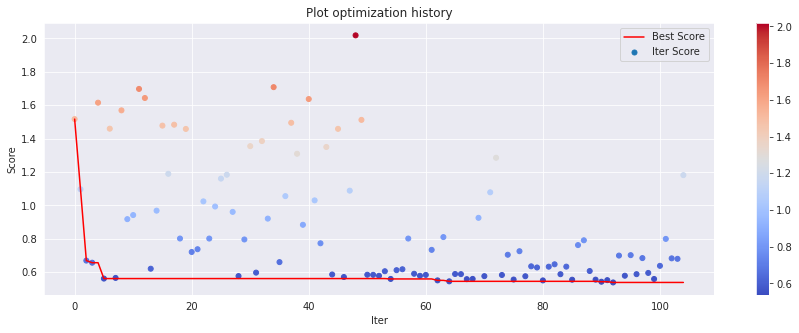

In [35]:
model.plot_opt_history()

## Feature Important

In [36]:
res = model.cross_val(predict=True, get_feature_importance=True,)
#res['Feature_importance']

<AxesSubplot:>

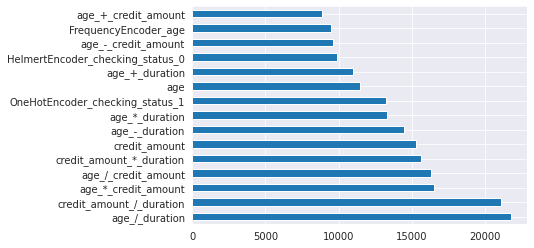

In [37]:
pd.Series(res['Feature_importance'], index=res['Feature_importance'].keys()).sort_values(ascending=False)[:15].plot(kind='barh')

## Predict from configs

In [38]:
top5_models = history.drop_duplicates(subset=['model_score', 'score_std'], keep='last').head(5)
top5_models

,score_opt,model_score,score_std,model_name,model_param,wrapper_params,cat_encoders,columns,cv_folds
92,0.5382,0.4922,0.046016,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(OneHotEncoder_other_parties_3, OneHotEncoder_...",10
90,0.5425,0.5030,0.039452,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(num_dependents, OneHotEncoder_other_parties_3...",10
64,0.5449,0.4846,0.060256,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(num_dependents, OneHotEncoder_own_telephone, ...",10
80,0.5504,0.5054,0.044980,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(num_dependents, OneHotEncoder_own_telephone, ...",10
62,0.5506,0.4993,0.051347,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","(duration, num_dependents, OneHotEncoder_other...",10


In [39]:
predicts = model.predict(models_cfgs=top5_models)
predicts

 20%|██        | 1/5 [00:30<02:01, 30.32s/it]
 Mean Score log_loss on 20 Folds: 0.5071 std: 0.039572
 40%|████      | 2/5 [01:03<01:33, 31.27s/it]
 Mean Score log_loss on 20 Folds: 0.5151 std: 0.028694
 60%|██████    | 3/5 [01:30<00:59, 29.77s/it]
 Mean Score log_loss on 20 Folds: 0.5063 std: 0.044698
 80%|████████  | 4/5 [01:45<00:25, 25.54s/it]
 Mean Score log_loss on 20 Folds: 0.5224 std: 0.027288
100%|██████████| 5/5 [02:24<00:00, 28.99s/it]
 Mean Score log_loss on 20 Folds: 0.5059 std: 0.044746



,model_name,predict_test,predict_train
0,92_LightGBM,"[0.25106260325550966, 0.40463500170914823, 0.5...","[0.16654429174431007, 0.1817455604567666, 0.66..."
1,90_LightGBM,"[0.29240548966863844, 0.4001823358741367, 0.51...","[0.20394562143103184, 0.2372787450635341, 0.60..."
2,64_LightGBM,"[0.2365349486953591, 0.3568826630031262, 0.636...","[0.23966932699608084, 0.1700225778156425, 0.69..."
3,80_LightGBM,"[0.2679376121999869, 0.37101886495117736, 0.50...","[0.2532007970779039, 0.2221927933954092, 0.577..."
4,62_LightGBM,"[0.25468375778546826, 0.4128604788644991, 0.61...","[0.21290849966589484, 0.16840838039468733, 0.7..."


In [40]:
print('Test metric: ', round(sklearn.metrics.log_loss(y_test, predicts['predict_test'].mean()),4))

Test metric:  0.4865
